<a href="https://colab.research.google.com/github/marekhennig/175IC-machine-learning/blob/main/Zad_Wyklad_9/Zad_Wyklad_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

width=635, height=420, depth=3


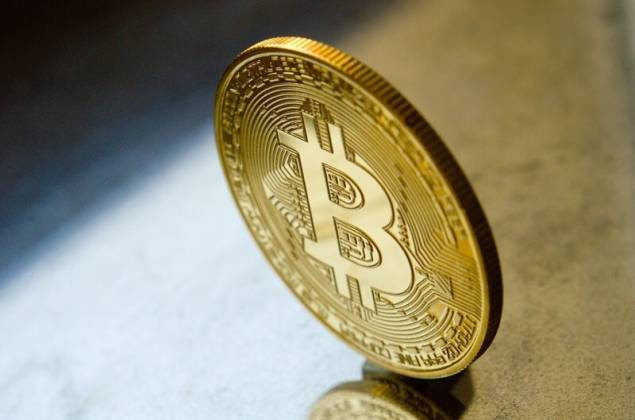

R=36, G=38, B=37


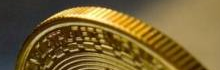

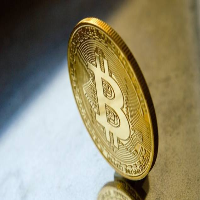

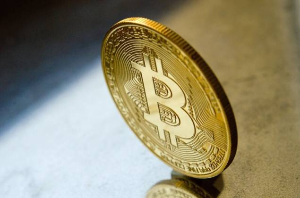

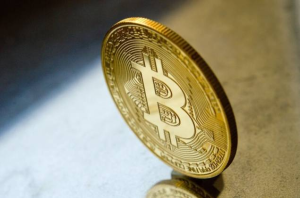

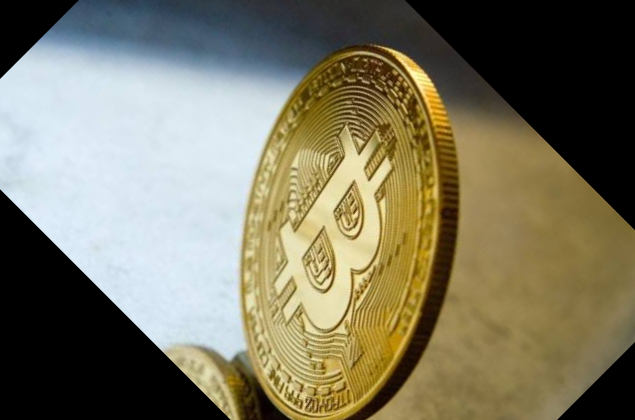

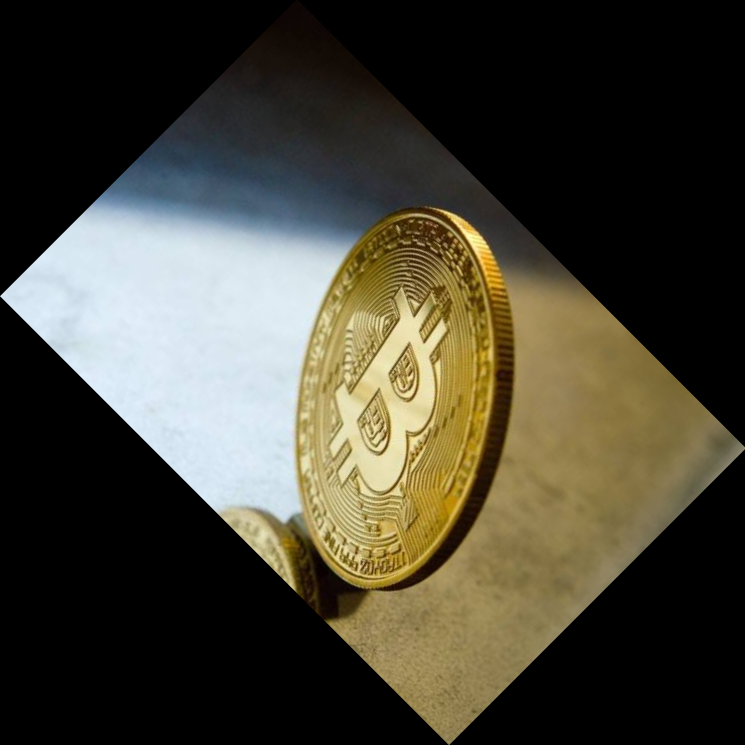

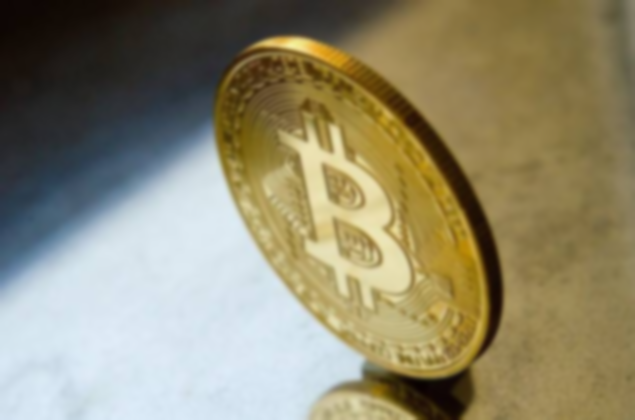

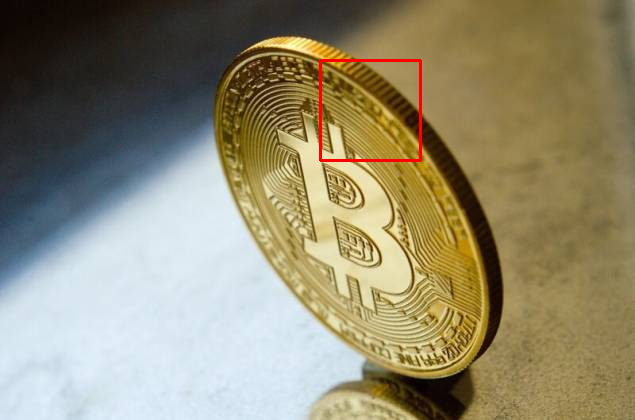

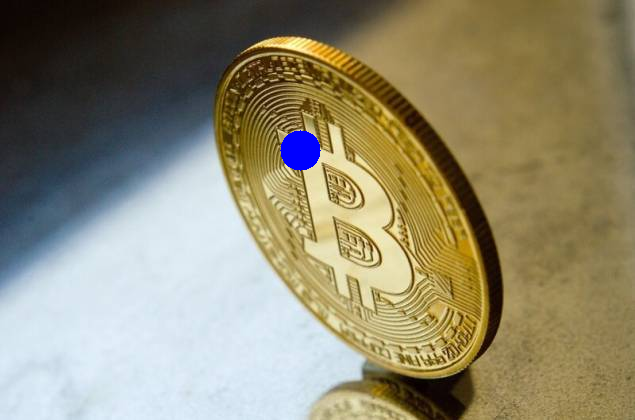

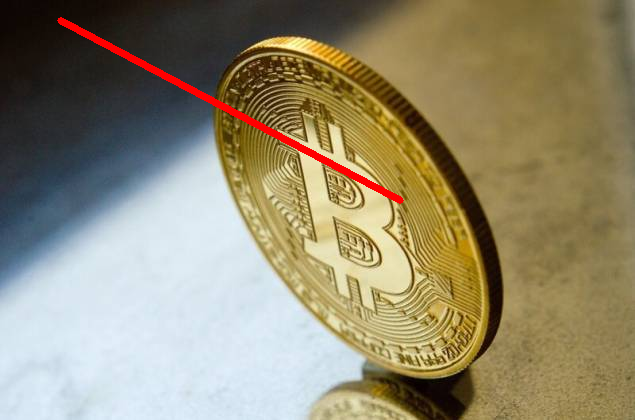

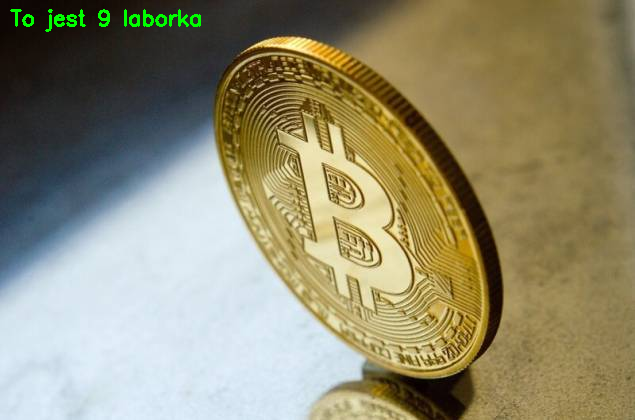

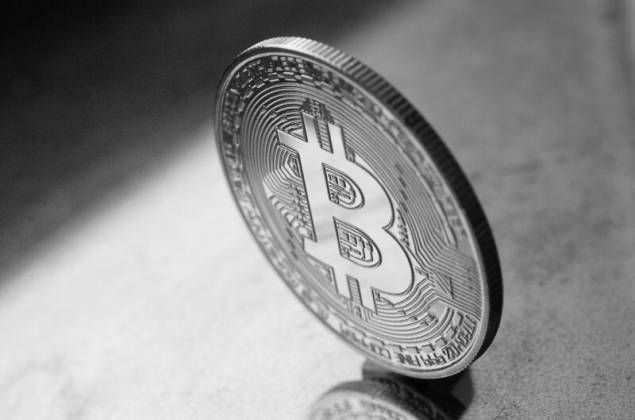

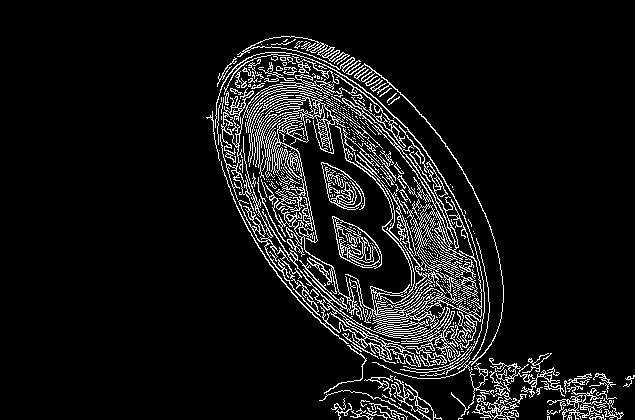

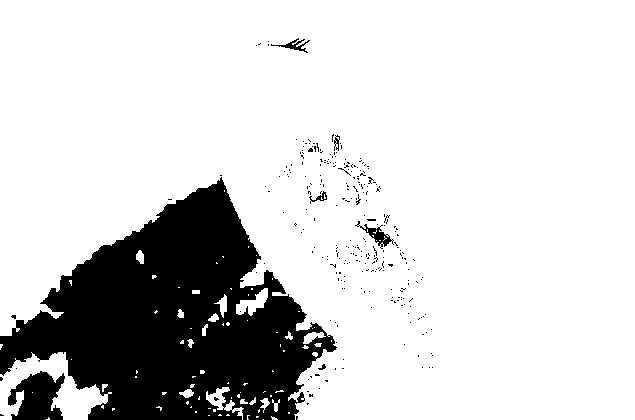

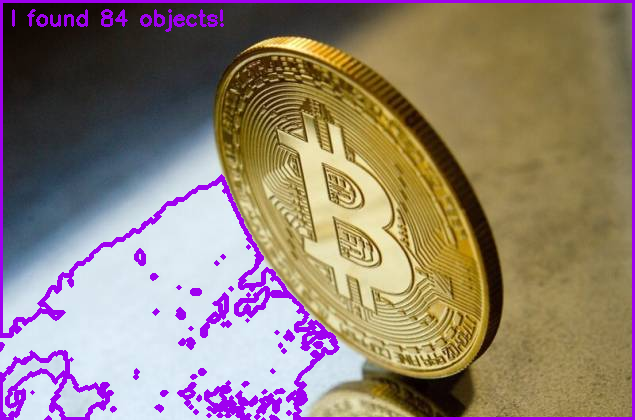

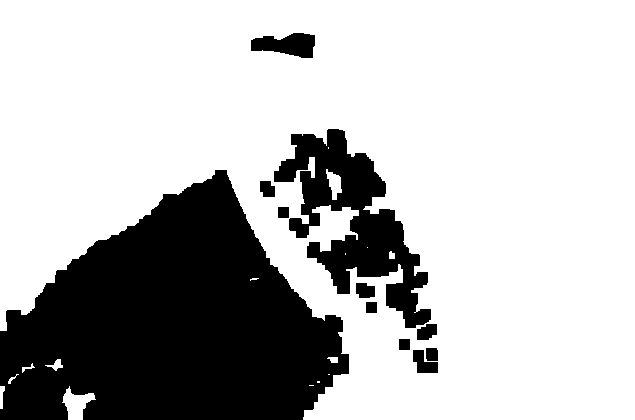

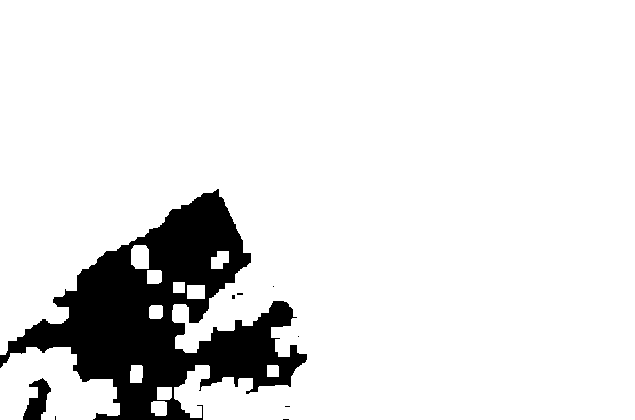

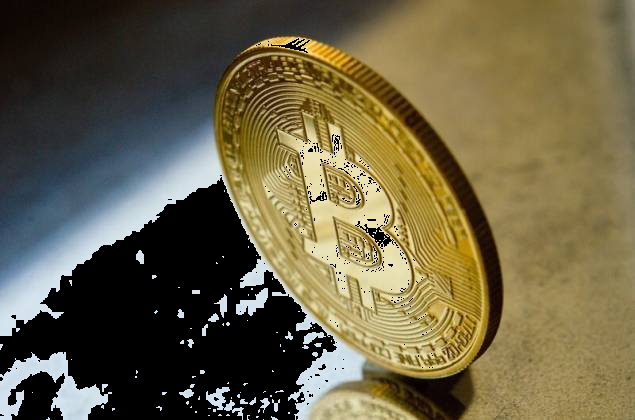

In [4]:
import imutils
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image

#Wczytanie obrazu
Image('bitcoin.jpeg')
image = cv2.imread('bitcoin.jpeg')
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d)) 

#Wyświetlenie Obrazu
cv2_imshow(image)
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))
roi = image[30:100, 200:420]

#ROI - Fragment obrazu, konkretne współrzędne
cv2_imshow(roi)
resized = cv2.resize(image, (200, 200))

#Resize - Zmiana wielkosci obrazu bez uzwglednienia proporcji
cv2_imshow(resized)
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)

#Resize - proporcje
cv2_imshow(resized)
resized = imutils.resize(image, width=300)
cv2_imshow(resized)

#Obrót względem środka obrazu
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)
rotated = imutils.rotate_bound(image, 45)
cv2_imshow(rotated)

#GaussianBlur
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2_imshow(blurred)
output = image.copy()

#Rysowanie po obrazie
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
cv2_imshow(output)
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
cv2_imshow(output)
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
cv2_imshow(output)
output = image.copy()

#PutText - Tekst w obrazie
cv2.putText(output, "To jest 9 laborka", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2_imshow(output)

#Skala Szarości
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#Wykrywanie krawędzi
edged = cv2.Canny(gray, 30, 150)
cv2_imshow(edged)

#Threshold - Oddzielenie pierwszego planu od tła za pomocą obrazu binarnego
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

#Wykrywanie konturow
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)

#Skalowanie elementów obrazu
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)
mask = thresh.copy()

#Maskowanie
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)